# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | zhangjiakou
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | paluan
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | hope
Processing Record 10 of Set 1 | naze
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | odweyne
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | taraza
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | kangaatsiaq
Processing 

Processing Record 37 of Set 4 | mananjary
Processing Record 38 of Set 4 | pacific grove
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | san francisco de coray
Processing Record 41 of Set 4 | beloha
Processing Record 42 of Set 4 | burica
City not found. Skipping...
Processing Record 43 of Set 4 | havre-saint-pierre
Processing Record 44 of Set 4 | hervey bay
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 0 of Set 5 | alofi
Processing Record 1 of Set 5 | ikongo
Processing Record 2 of Set 5 | cabot
Processing Record 3 of Set 5 | bathsheba
Processing Record 4 of Set 5 | harper
Processing Record 5 of Set 5 | avarua
Processing Record 6 of Set 5 | emerald
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | bro

Processing Record 27 of Set 8 | highland park
Processing Record 28 of Set 8 | outjo
Processing Record 29 of Set 8 | basco
Processing Record 30 of Set 8 | ambovombe
Processing Record 31 of Set 8 | bonavista
Processing Record 32 of Set 8 | bodden town
Processing Record 33 of Set 8 | mahebourg
Processing Record 34 of Set 8 | zhuanghe
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | jiroft
City not found. Skipping...
Processing Record 37 of Set 8 | durant
Processing Record 38 of Set 8 | cruzeiro do sul
Processing Record 39 of Set 8 | rawson
Processing Record 40 of Set 8 | bubaque
Processing Record 41 of Set 8 | zaraza
Processing Record 42 of Set 8 | camacha
Processing Record 43 of Set 8 | kuche
City not found. Skipping...
Processing Record 44 of Set 8 | panama city
Processing Record 45 of Set 8 | morro bay
Processing Record 46 of Set 8 | la crau
Processing Record 47 of Set 8 | puerto penasco
Processing Record 48 of Set 8 | geraldton
Processing Record 49 of

Processing Record 12 of Set 12 | sladkovo
Processing Record 13 of Set 12 | nongstoin
Processing Record 14 of Set 12 | aloleng
Processing Record 15 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 12 | valtierrilla
Processing Record 17 of Set 12 | santa cruz
Processing Record 18 of Set 12 | bol
Processing Record 19 of Set 12 | namatanai
Processing Record 20 of Set 12 | turka
Processing Record 21 of Set 12 | bonaventure
Processing Record 22 of Set 12 | irbeyskoye
Processing Record 23 of Set 12 | coihaique
Processing Record 24 of Set 12 | kushmurun
Processing Record 25 of Set 12 | magadan
Processing Record 26 of Set 12 | diego de almagro
Processing Record 27 of Set 12 | henties bay
Processing Record 28 of Set 12 | vilyuysk
Processing Record 29 of Set 12 | kupang
Processing Record 30 of Set 12 | santa isabel
Processing Record 31 of Set 12 | kralendijk
Processing Record 32 of Set 12 | myrtle beach
Processing Record 33 of Set 12 | aljezur
Processing Record 34 of 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,10.27,75,100,3.60,NZ,1670130101
1,zhangjiakou,40.8100,114.8794,-5.57,20,5,2.08,CN,1670130043
2,torbay,47.6666,-52.7314,1.26,81,47,0.45,CA,1670130033
3,aykhal,66.0000,111.5000,-11.50,93,100,12.55,RU,1670130102
4,atuona,-9.8000,-139.0333,25.40,79,5,7.74,PF,1670130093


In [89]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [90]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,10.27,75,100,3.60,NZ,1670130101
1,zhangjiakou,40.8100,114.8794,-5.57,20,5,2.08,CN,1670130043
2,torbay,47.6666,-52.7314,1.26,81,47,0.45,CA,1670130033
3,aykhal,66.0000,111.5000,-11.50,93,100,12.55,RU,1670130102
4,atuona,-9.8000,-139.0333,25.40,79,5,7.74,PF,1670130093


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

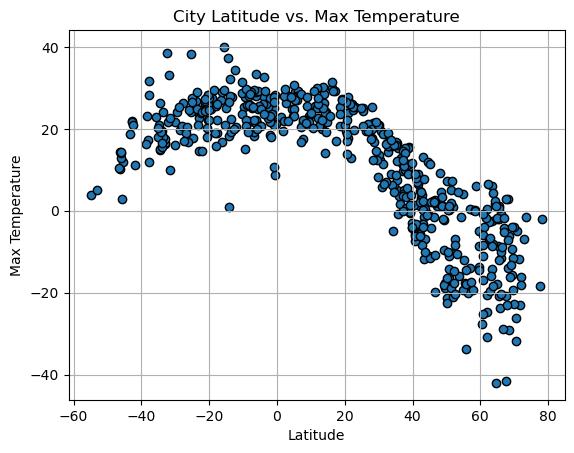

In [91]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

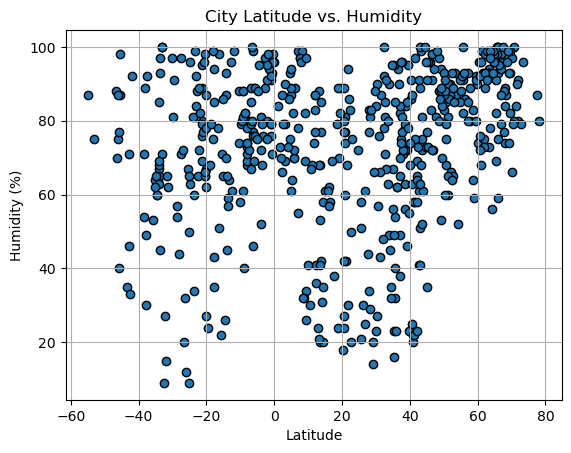

In [92]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

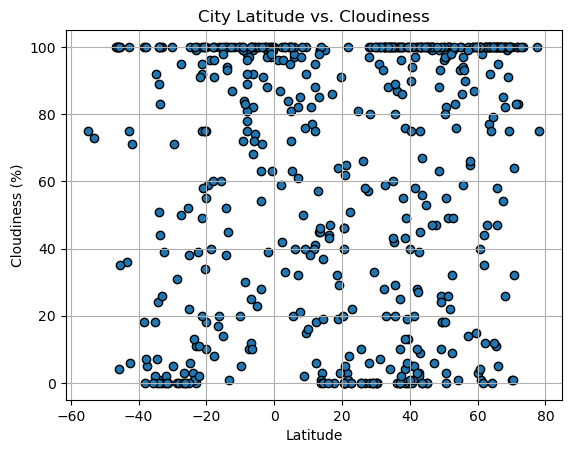

In [93]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

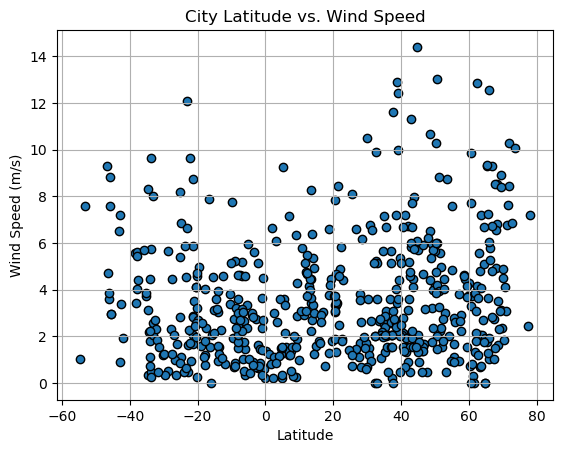

In [94]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def lnplot(x,y,xtext, ytext):
    plt.plot(x, y, 'o')
    slope, intercept, r, p, std_err = linregress(list(x),list(y))
    expected_y = [intercept + slope * i for i in list(x)]
    plt.plot(x, expected_y, color='red')
    ln_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(ln_eq, (0,10),fontsize=15, color='red')
    plt.xlabel(f'{xtext}')
    plt.ylabel(f'{ytext}')
    print(f'The r-value is : {r**2}')
    plt.show()

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zhangjiakou,40.8100,114.8794,-5.57,20,5,2.08,CN,1670130043
2,torbay,47.6666,-52.7314,1.26,81,47,0.45,CA,1670130033
3,aykhal,66.0000,111.5000,-11.50,93,100,12.55,RU,1670130102
6,paluan,13.4160,120.4623,29.75,68,99,3.41,PH,1670130102
8,hope,33.6671,-93.5916,8.93,63,88,2.65,US,1670130102


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,10.27,75,100,3.60,NZ,1670130101
4,atuona,-9.8000,-139.0333,25.40,79,5,7.74,PF,1670130093
5,busselton,-33.6500,115.3333,24.20,45,44,5.76,AU,1670130096
7,mar del plata,-38.0023,-57.5575,17.15,89,0,4.02,AR,1670130013
10,esperance,-33.8667,121.9000,19.52,67,89,9.66,AU,1670130103


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7352068727014863


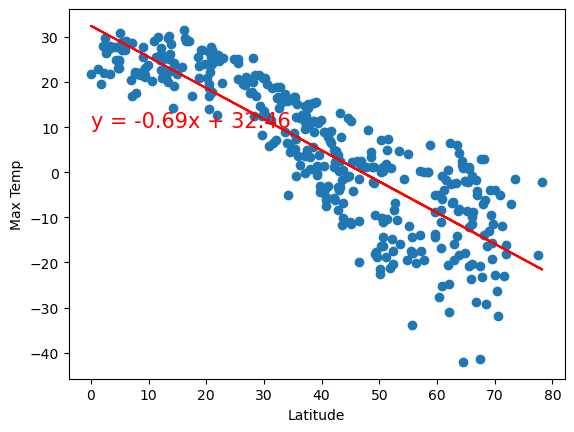

In [98]:
# Linear regression on Northern Hemisphere
lnplot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude', 'Max Temp')

The r-value is : 0.18666141899171246


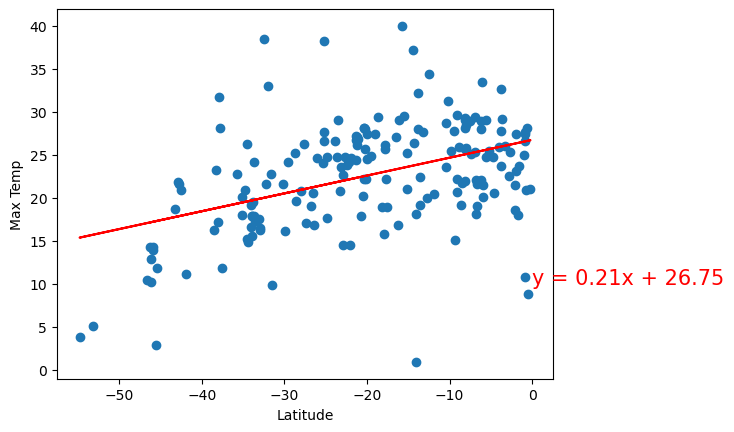

In [99]:
# Linear regression on Southern Hemisphere
lnplot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude', 'Max Temp')

**Discussion about the linear relationship:** The R square is 0.735 for the linear regression model between latitude and max temperature in northen hemisphere, which means the model explains the pattern prettey well. However, the linear regression model seems like not a good fit for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.1439556620408834


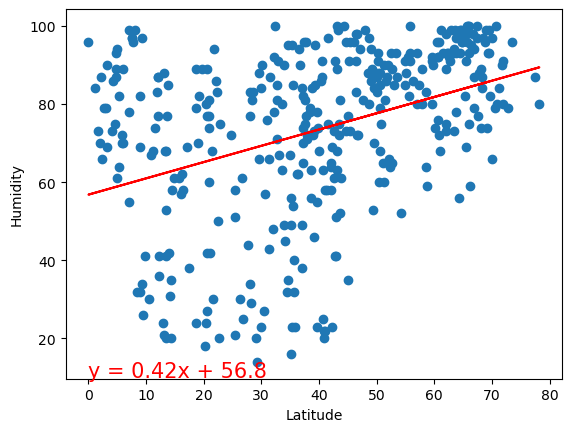

In [100]:
# Northern Hemisphere
lnplot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude', 'Humidity')

The r-value is : 0.05664122497823209


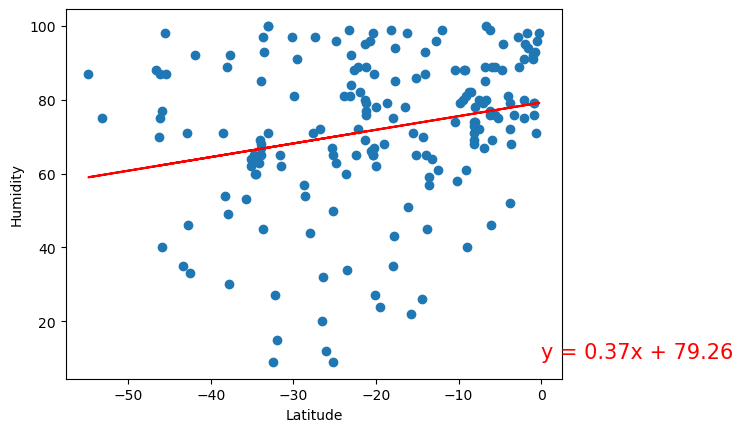

In [101]:
# Southern Hemisphere
lnplot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude', 'Humidity')

**Discussion about the linear relationship:** The linear regression models can not explain the correlations between humidity and latitude for both hemisphere very well, since the R square value is too small.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.036110942707167935


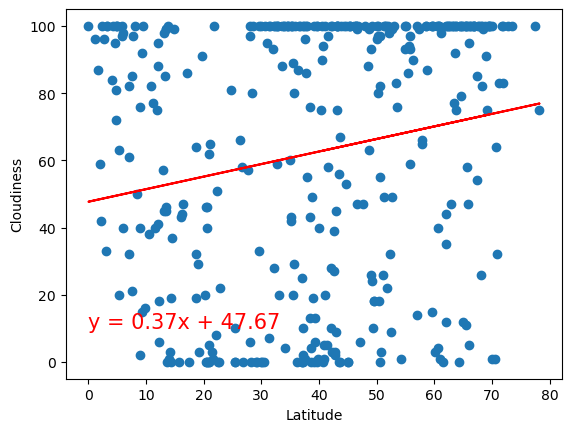

In [102]:
# Northern Hemisphere
lnplot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude', 'Cloudiness')

The r-value is : 0.09536595756875468


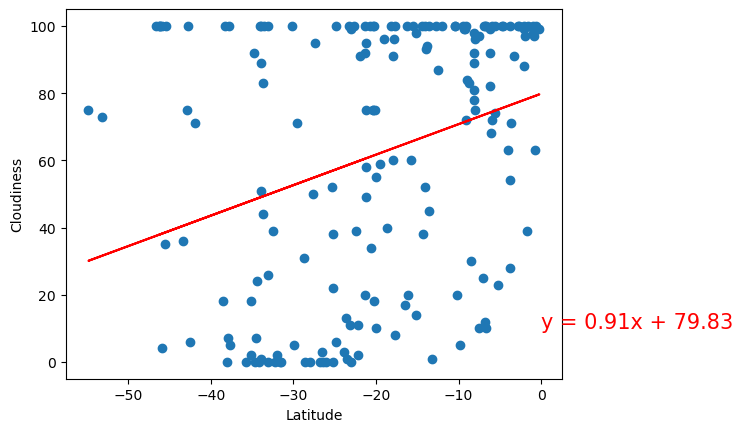

In [103]:
# Southern Hemisphere
lnplot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The linear regression models can not explain the correlations between cloudiness and latitude for both hemisphere very well, since the R square value is too small.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.03890092321306581


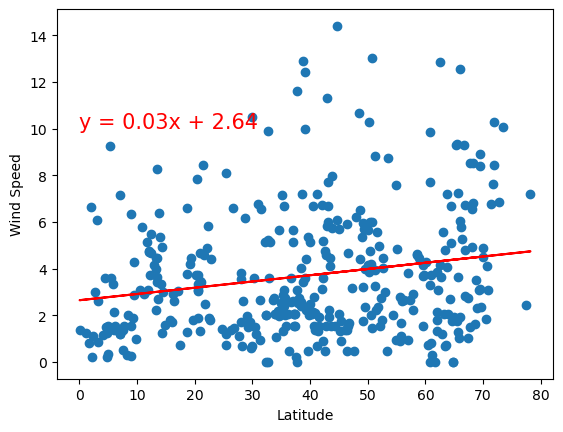

In [104]:
# Northern Hemisphere
lnplot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude', 'Wind Speed')

The r-value is : 0.07648119337380563


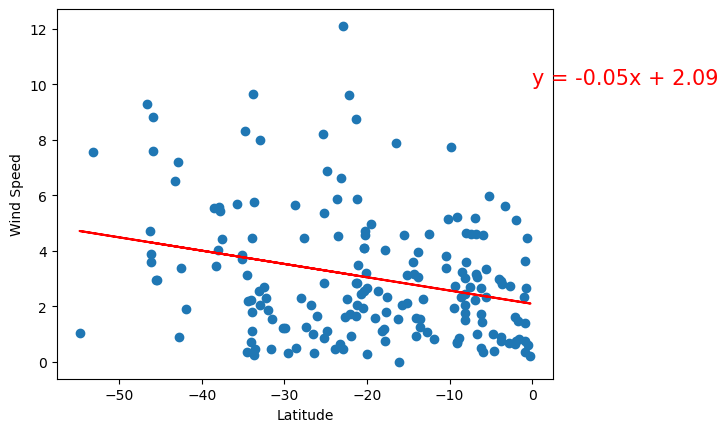

In [105]:
# Southern Hemisphere
lnplot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** The linear regression models can not explain the correlations between windy speed and latitude for both hemisphere very well, since the R square value is too small.